<a href="https://colab.research.google.com/github/19003934-UHI/Data_Analytics/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analytics on the Web - Assignment 1** 

# Introduction


The emergency services of New York City are wanting to investigate the relationship between the weather and the number of traffic collisions on a particular day. Within this they would like to see a linear regression model which describes this relationship. They hope that this will help optimise the response times of emergency staff. The accompanying CSV file has the data of collisions which occured between 2012 and 2020, with data for the weather on each day present as well. The CSV file will be analysed to find what factors are involved when finding the relationship between the weather and number of traffic collisions on a given day.

Below, the file which contains the gathered collision data is to be imported.

# Methodology

The data in the below file is to be analysed by creating graphs for each corresponding factor along with the number of crashes which occured. This will help determine whether it was a cause of an increased rate of crashes. Below each graph, the 'cor' command will be used to find any correlation between the number of crashes and the accompanying factor. If there is a weak to positive correlation, then this will be considered as a contributing factor for an increased rate of crashes. If not, then the factor will be disregarded.

After the analysis, a linear regression model will be created to further investigate the biggest factors of crashes within New York City.

In [5]:
# Import CSV file from GitHub repo
data <- read.csv("https://raw.githubusercontent.com/19003934-UHI/Data_Analytics/main/bquxjob_49d5e1e3_1872d26a08d.csv", stringsAsFactors = TRUE)

Now that the CSV file has been imported, the contents can be examined. This is done by using the head() command.

In [6]:
# Examine imported dataset, displays the first 6 entries.
head(data)

,day,year,mo,da,collision_date,temp,dewp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2018,9,23,2018-09-23,59.8,50.2,10.0,3.0,5.1,999.9,78.1,53.1,0,999.9,0,475
2,4,2018,12,20,2018-12-20,38.6,34.4,9.6,5.0,7.0,999.9,48.0,21.0,0,999.9,0,806
3,2,2013,11,5,2013-11-05,43.5,30.4,10.0,3.9,7.0,999.9,50.0,37.9,0,999.9,0,510
4,3,2012,7,11,2012-07-11,77.1,62.0,10.0,1.9,7.0,999.9,84.0,64.9,0,999.9,0,565
5,4,2012,8,9,2012-08-09,78.2,69.6,9.3,2.3,7.0,15.0,88.0,61.0,0,999.9,0,581
6,4,2012,7,12,2012-07-12,77.4,60.2,10.0,2.3,7.0,999.9,88.0,57.0,0,999.9,0,577


As shown above, this dataset has 17 different headings, with 11 of those having some sort of impact on the number of collisions which have occured on a given day. These are as follows:

1.   Temp - The mean temperature on the day, in Fahrenheit
2.   Dewp - The mean dew point on the day, in Fahrenheit
3.   Visib - The mean visbility on the day, in miles
4.   Wdsp - The mean wind speed on the day, in knots
5.   Mxpsd - The maximum wind speed on the day, in knots
6.   Gust - The maximum wind gust on the day, in knots
7.   Max - The maximum temperature on the day, in Fahrenheit
8.   Min - The minimum temperature on the day, in Fahrenheit
9.   Prcp - The total precipitation (rain and/or melted snow) on the day, in inches
10.  Sndp - The snow depth on the day, in inches 
11.  Fog - Whether fog was present on the day, 1 for present, 0 for not present



Within this document, these variables will be tested to find correlations between them for resulting in an increase or decrease in collisions.

First, a graph is plotted to see whether the day of the week has any effect on the number of collisions on a given day.

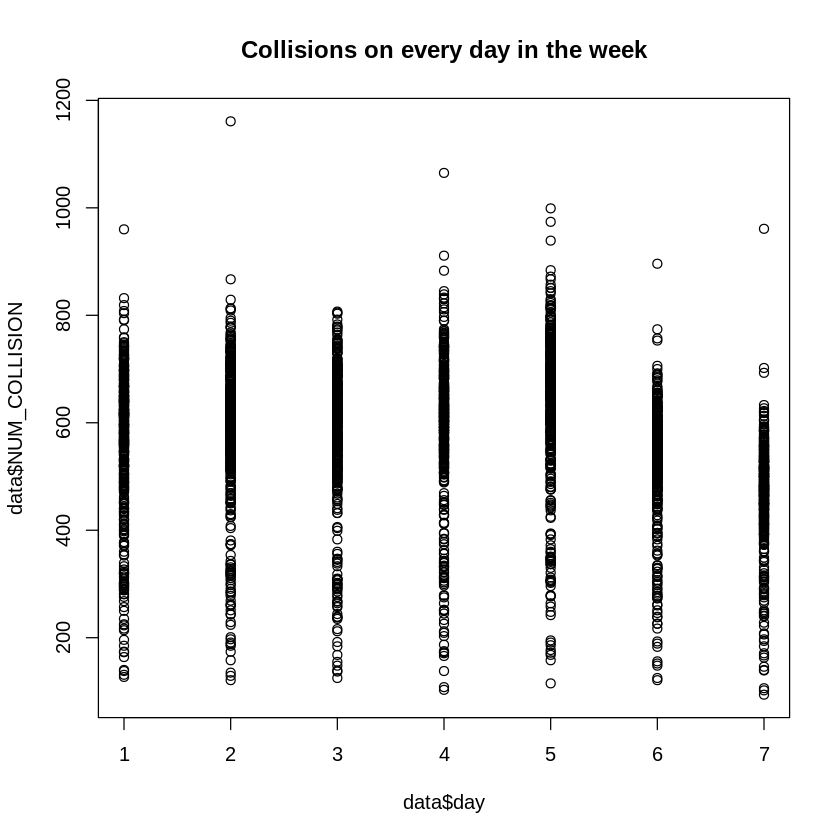

In [7]:
plot(data$day, data$NUM_COLLISION, main="Collisions on every day in the week")

The number of collisions were higher during the work week than the weekend, which can indicate that since more people drive during the week that there is a higher chance of crashing than on the weekend. This could show that people are less inclined to travel outwith the work week, and therefore at a lesser risk of crashing.



In [8]:
# Correlation between the day of the week and number of collisions
cor(data$day, data$NUM_COLLISIONS)

[1] -0.188439

There is a negative weak correlation between the day of the week and the number of collisions which have occured. This is still worth taking into account as some days will have higher traffic numbers than others, which could impact the number of collisions on a given day.

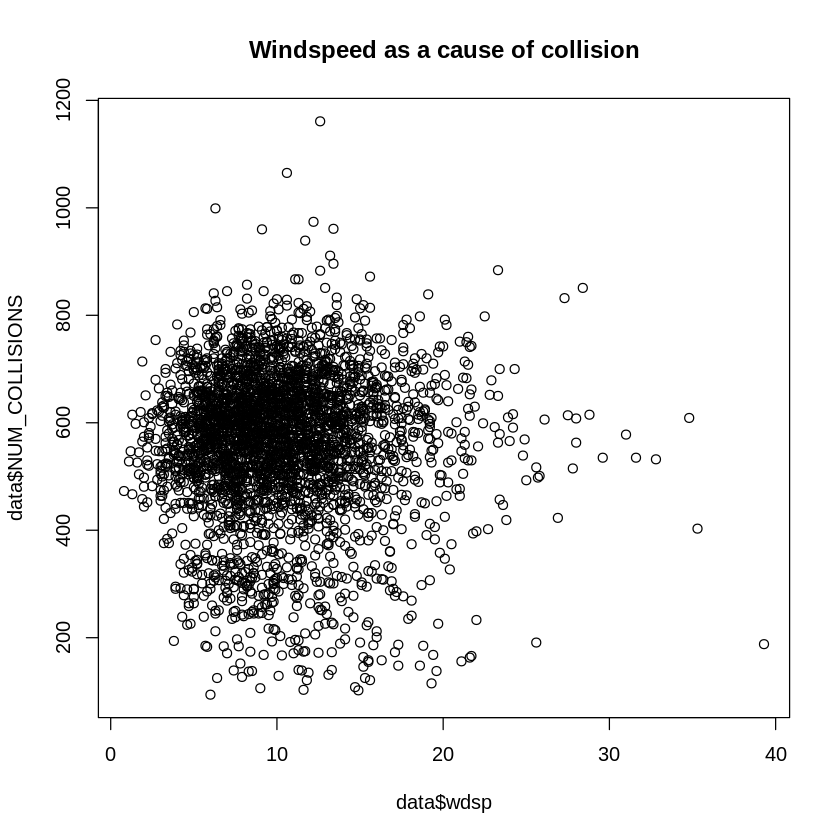

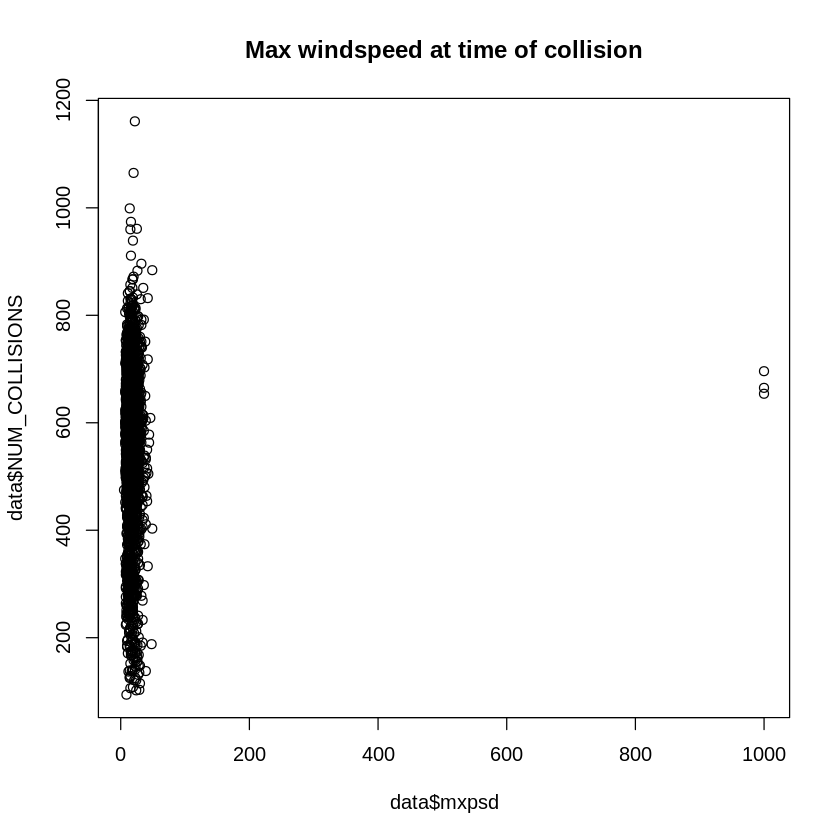

In [9]:
# Graphs relating to windspeed
plot(data$wdsp, data$NUM_COLLISIONS, main="Windspeed as a cause of collision")
plot(data$mxpsd, data$NUM_COLLISIONS, main="Max windspeed at time of collision")

From the two graphs above, max windspeed has a small to negligable impact on the number of collisions throughout the year, however windspeed in general can have some impact on collision occurences. There does not seem to be much of an impact at higher windspeeds however, as most collisions happen when the wind speed is below 20 knots (~23.02 mph).

In [10]:
# Find correlation between wind speed and collision numbers
cor(data$wdsp, data$NUM_COLLISIONS)
cor(data$mxpsd, data$NUM_COLLISIONS)

[1] -0.008337766

[1] 0.02098139

There is not much of a correlation between the wind speed and the number of collisions. While there is an argument for its impact on collisions the wind speed never goes beyond the realm of 40 knots (~46.03 mph), which means that wind speed stays around the normal safe levels.

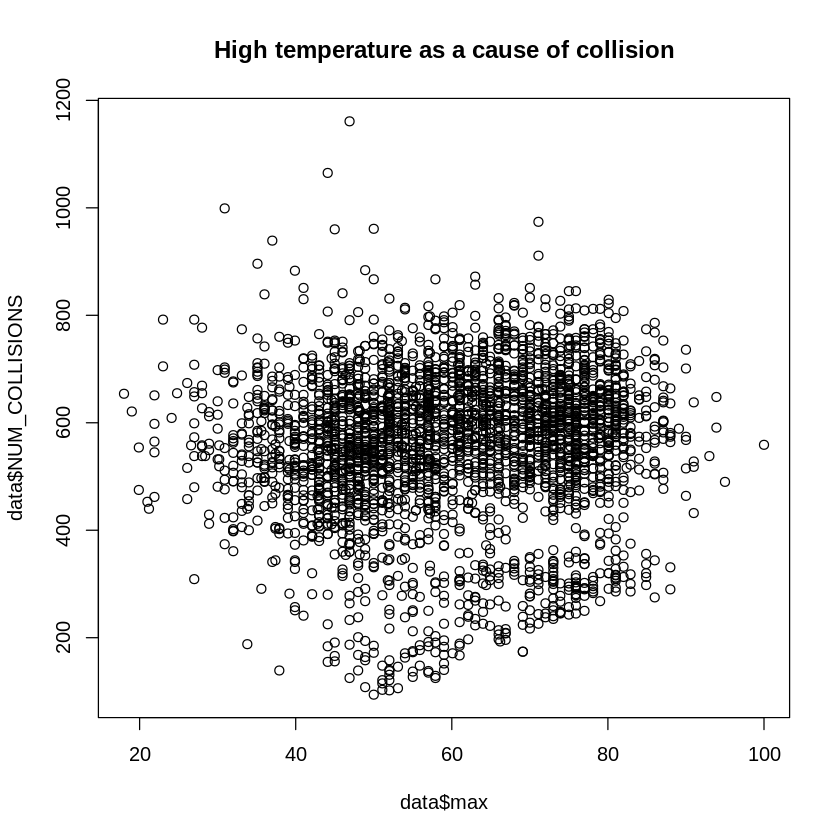

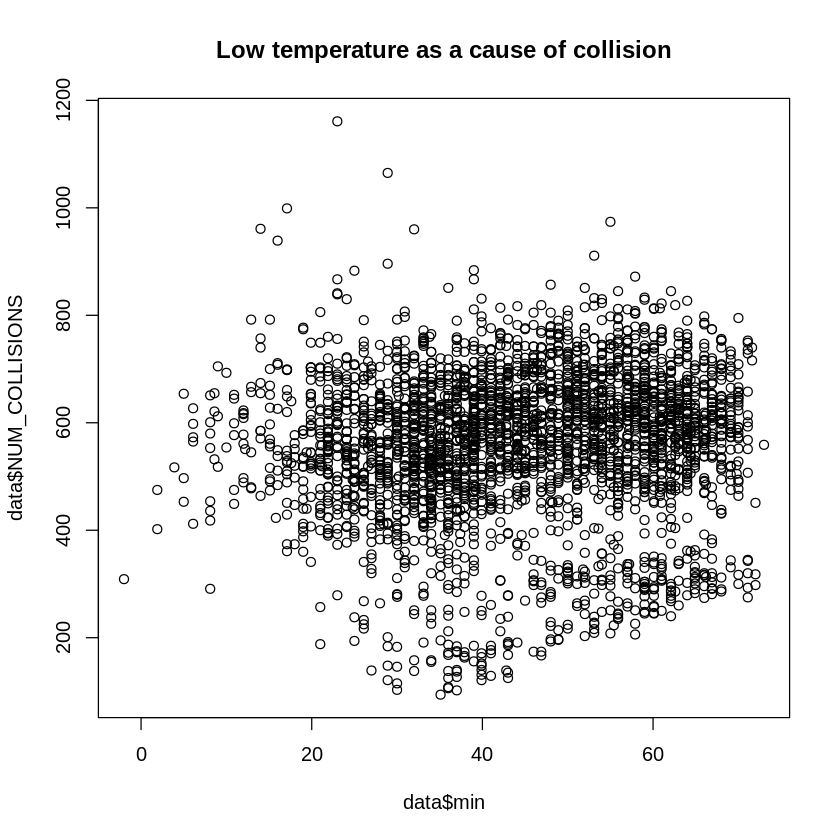

In [11]:
# Graphs relating to temperature
plot(data$max, data$NUM_COLLISIONS, main="High temperature as a cause of collision")
plot(data$min, data$NUM_COLLISIONS, main="Low temperature as a cause of collision")

Temperature seems to play a role in the number of collisions, with a majority of collisions occuring at around 40 degrees Fahrenheit (around 4 degrees Celsius). This would make sense as this is the point where ice can be lying on the raods. People may think that the roads are safe but end up crashing due to skidding on said ice.

There are some cases of collisions occuring at higher temperatures, the highest being around 100 degress Fahrenheit (~37.7 degress Celsius), however, much like the case with wind speeds, this type of temperature is very rarely reached. This makes higher temperatures less likely to have an impact on the number of collisions.


In [17]:
# Correlation between max temperature and number of collisions
cor(data$max, data$NUM_COLLISIONS)
# Correlation between min temperature and number of collisions
cor(data$min, data$NUM_COLLISIONS)

[1] 0.08389711

[1] 0.07068185

There is a positive correlation between the temperature as a cause of collision, with lower temperatures providing a higher correlation. Again this is to be expected as lower temperatures are more dangerous to drive in, especially when the driver has little experience driving in these conditions.

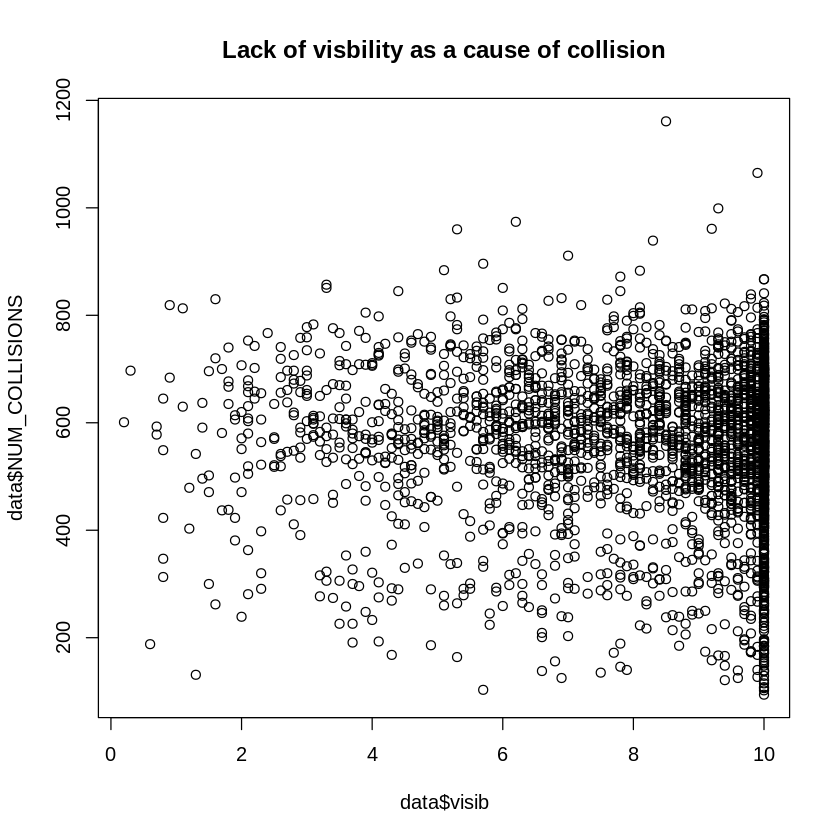

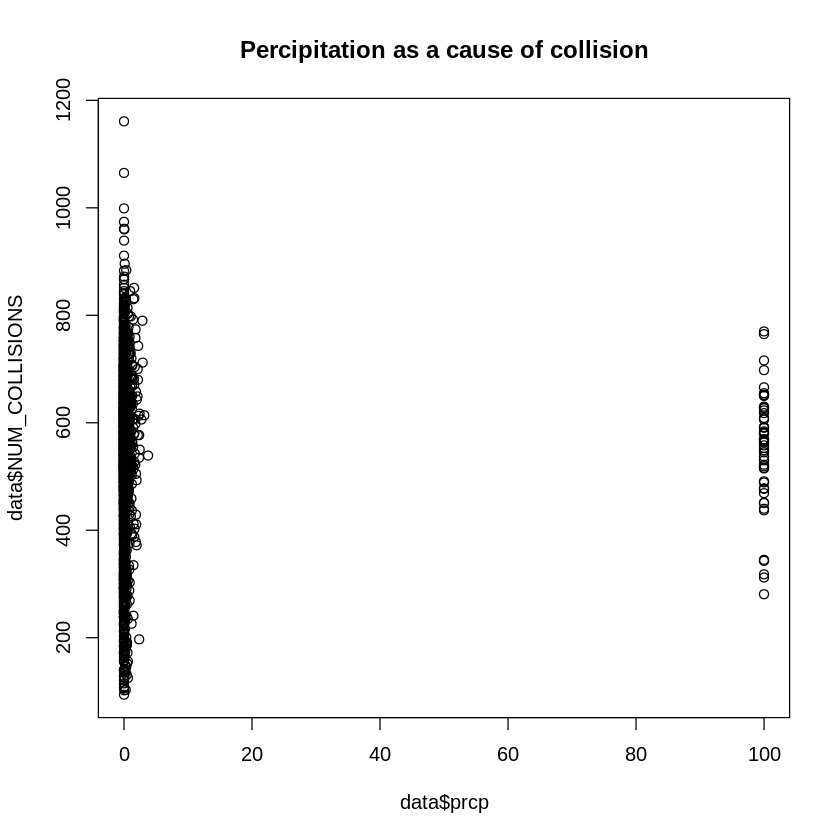

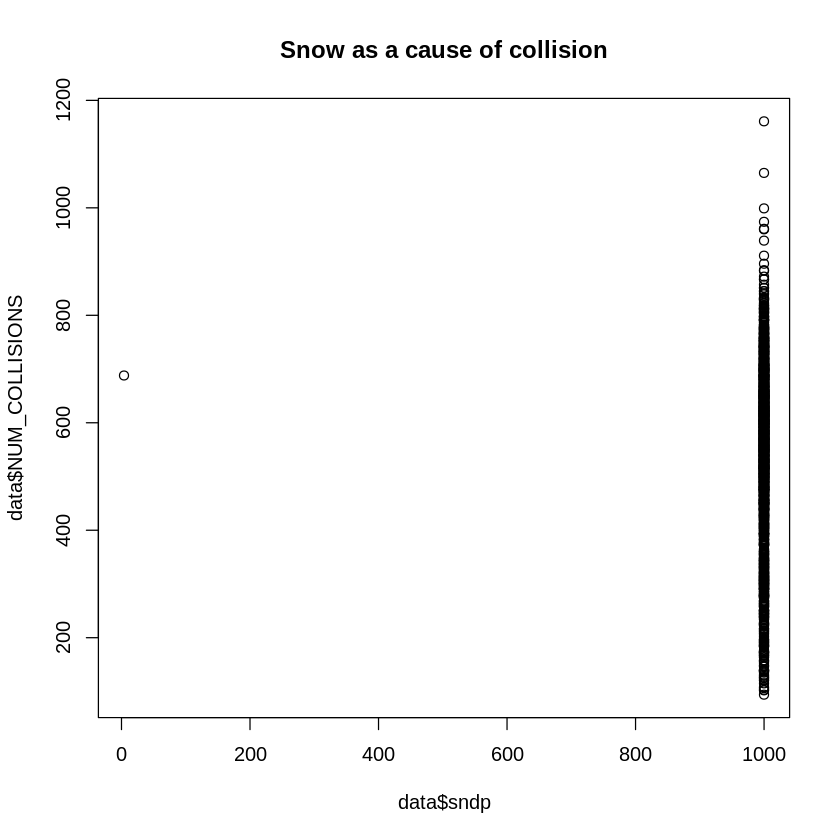

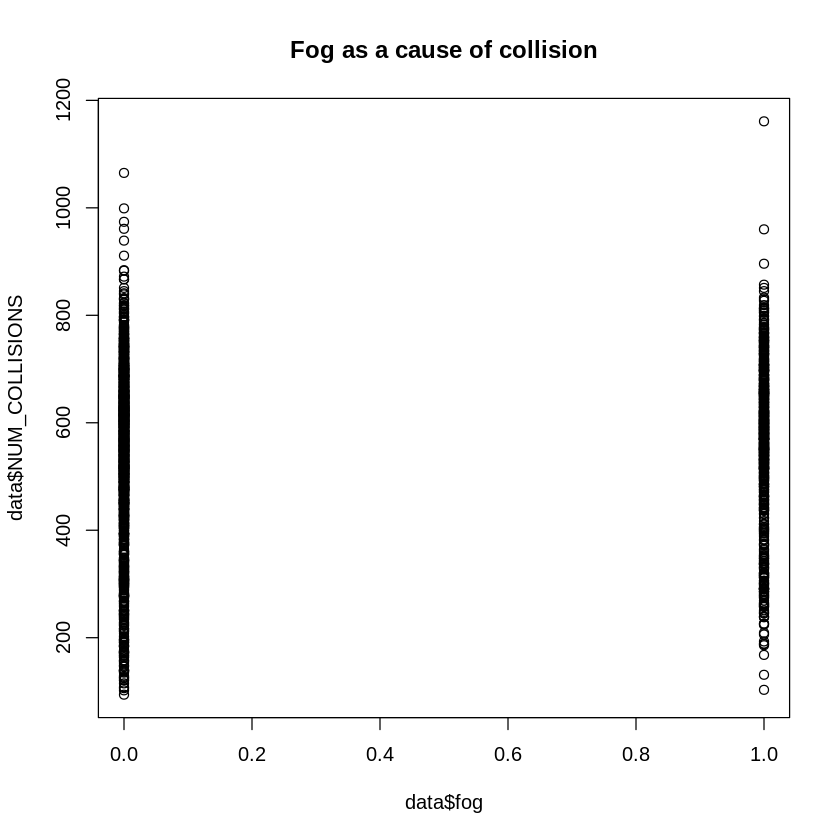

In [13]:
# Graphs for variables which lead to poorer visibility

plot(data$visib, data$NUM_COLLISIONS, main="Lack of visbility as a cause of collision")
plot(data$prcp, data$NUM_COLLISIONS, main="Percipitation as a cause of collision")
plot(data$sndp, data$NUM_COLLISIONS, main="Snow as a cause of collision")
plot(data$fog, data$NUM_COLLISIONS, main="Fog as a cause of collision")

Out of the four graphs above, the most common cause of collisions was a lack of visibility. Both percipitation and fog were less important as factors in collisions, with fog being more likely as a cause than percipitation. As expected, snow was another common cause of collision, however this realisitcaly would only make up for a quarter of the year. Outside of freak weather events, collisions as a result of snowy weather are relegated to the winter months.

In [14]:
# Correlation between visibility and number of collisions
cor(data$visib, data$NUM_COLLISIONS)
# Correlation between percipitation and number of collisions
cor(data$prcp, data$NUM_COLLISIONS)
# Correlation between snow depth and number of collisions
cor(data$sndp, data$NUM_COLLISIONS)
# Correlation between fog and number of collisions
cor(data$fog, data$NUM_COLLISIONS)

[1] -0.04000591

[1] -0.01032106

[1] -0.0164652

[1] 0.03359774

As visibility is quite important when driving, especially when driving in a heavily congested or populated area, it is not surprising to find a positive correlation between lack of visibility and the number of collisions occuring.

From this assessment, it can be assumed that the biggest factors contributing to high collision rates on a given day are as follows:


1.   The temperature (both max and min)
2.   The day of the week (weak correlation but still important)
3.   Percipitation (both rain and snow)
4.   Fog (poor visibility)



The following section will cover the training of the linear regression model.

In [18]:
head(data)

,day,year,mo,da,collision_date,temp,dewp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2018,9,23,2018-09-23,59.8,50.2,10.0,3.0,5.1,999.9,78.1,53.1,0,999.9,0,475
2,4,2018,12,20,2018-12-20,38.6,34.4,9.6,5.0,7.0,999.9,48.0,21.0,0,999.9,0,806
3,2,2013,11,5,2013-11-05,43.5,30.4,10.0,3.9,7.0,999.9,50.0,37.9,0,999.9,0,510
4,3,2012,7,11,2012-07-11,77.1,62.0,10.0,1.9,7.0,999.9,84.0,64.9,0,999.9,0,565
5,4,2012,8,9,2012-08-09,78.2,69.6,9.3,2.3,7.0,15.0,88.0,61.0,0,999.9,0,581
6,4,2012,7,12,2012-07-12,77.4,60.2,10.0,2.3,7.0,999.9,88.0,57.0,0,999.9,0,577


In [19]:
summary(data)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.998   Mean   :2016   Mean   : 6.652   Mean   :15.68  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
                                                                
    collision_date      temp            dewp              visib       
 2014-02-28:   2   Min.   : 5.80   Min.   :   -6.70   Min.   : 0.200  
 2014-03-01:   2   1st Qu.:41.20   1st Qu.:   32.50   1st Qu.: 7.100  
 2014-03-02:   2   Median :52.40   Median :   45.50   Median : 9.400  
 2014-03-03:   2   Mean   :52.12   Mean   :   47.63   Mean   : 8.322  
 2014-03-04:   2   3rd Qu.:64.50   3rd Qu.:   58.80   3rd Qu.:10.000  
 2014-03-05:   2   Max.   :86.70   Max.   : 9999.90   

First, both the max and min temperatures will be analysed.

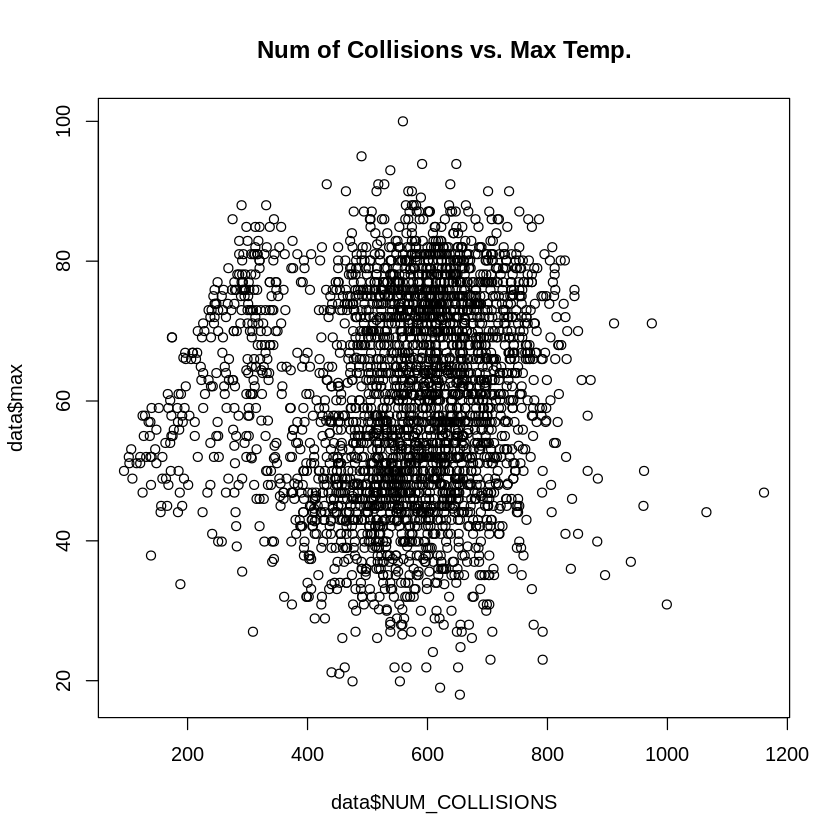

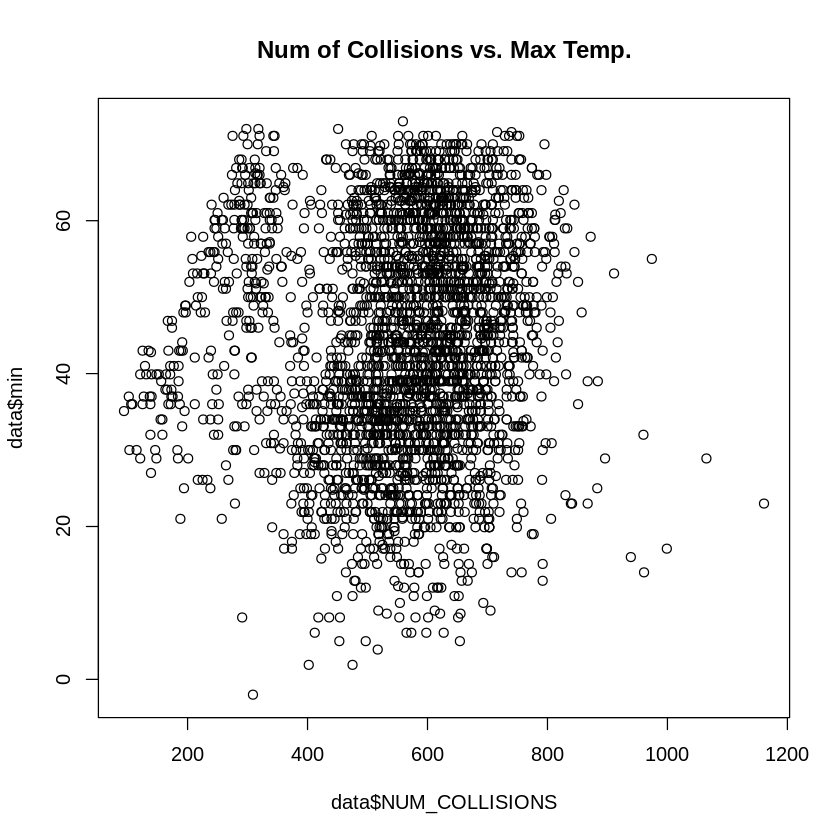

In [31]:
plot(data$NUM_COLLISIONS, data$max, main="Num of Collisions vs. Max Temp.")
plot(data$NUM_COLLISIONS, data$min, main="Num of Collisions vs. Max Temp.")

In [24]:
results <- lm(data$max ~ data$NUM_COLLISIONS)
summary(results)


Call:
lm(formula = data$max ~ data$NUM_COLLISIONS)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.965 -11.213   0.142  12.391  39.878 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         55.166345   1.082356  50.969  < 2e-16 ***
data$NUM_COLLISIONS  0.008866   0.001872   4.735 2.29e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.36 on 3163 degrees of freedom
Multiple R-squared:  0.007039,	Adjusted R-squared:  0.006725 
F-statistic: 22.42 on 1 and 3163 DF,  p-value: 2.286e-06


##Put something here

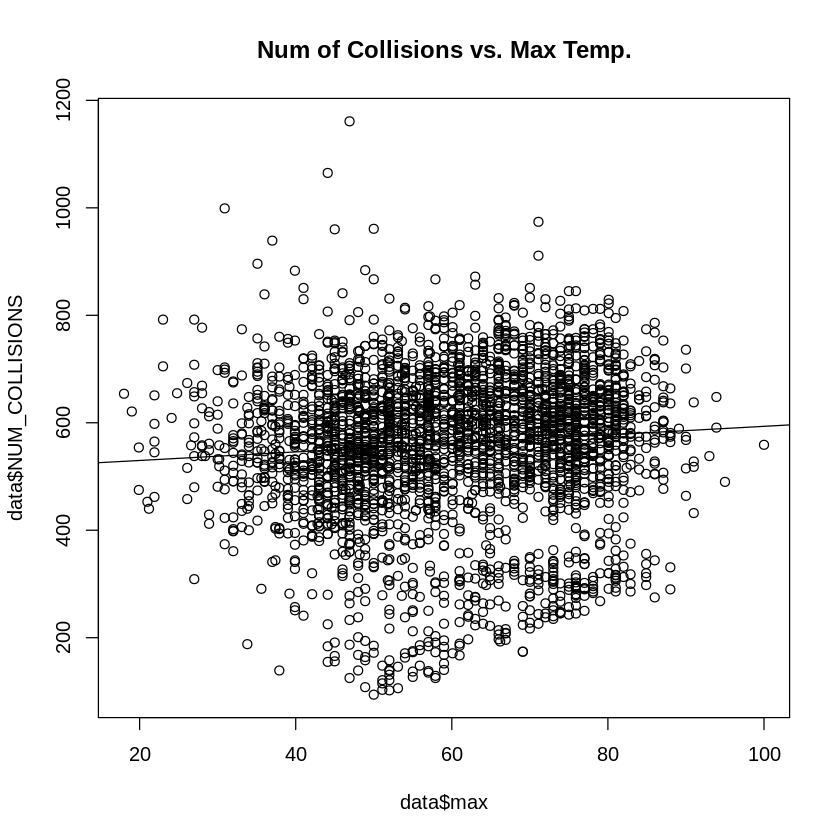

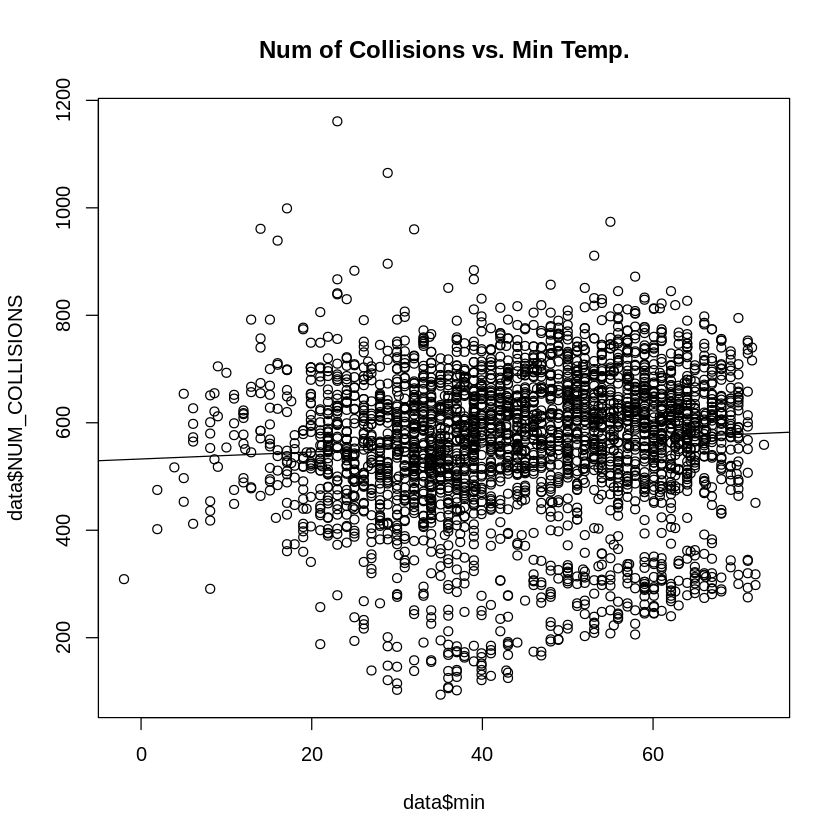

In [30]:
plot(data$max, data$NUM_COLLISIONS, main="Num of Collisions vs. Max Temp.")
# Line of best fit
abline(lm(data$NUM_COLLISIONS ~ data$max))

plot(data$min, data$NUM_COLLISIONS, main="Num of Collisions vs. Min Temp.")
# Line of best fit
abline(lm(data$NUM_COLLISIONS ~ data$min))

From the drawn line of best fit, it can be assumed that with an increase in temperature there will be more crashes. 

Next, the days of the week will be analysed.

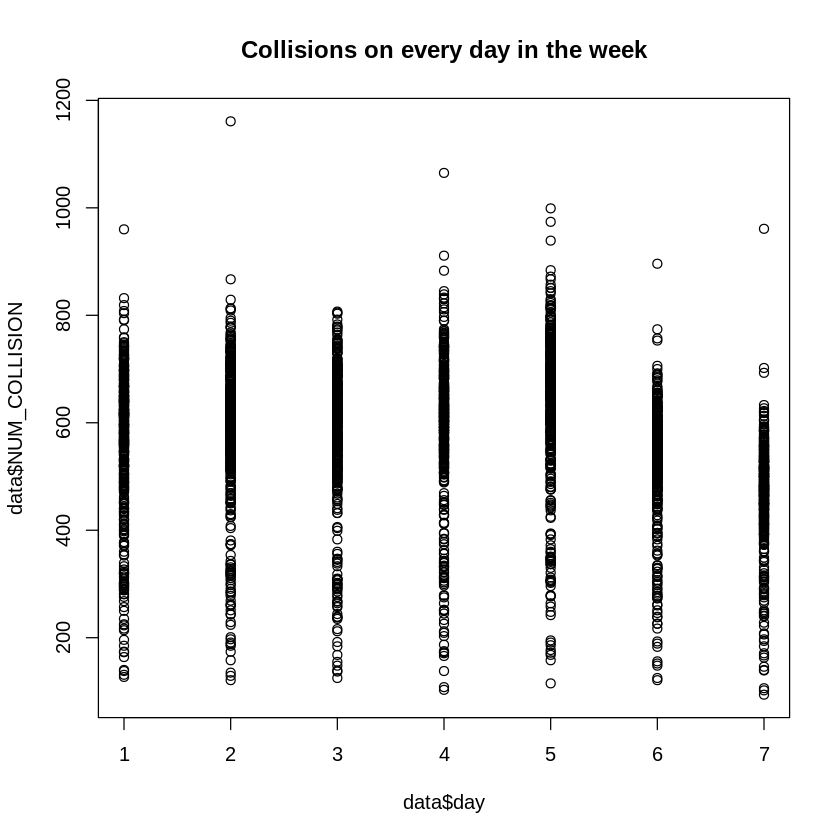

In [32]:
plot(data$day, data$NUM_COLLISION, main="Collisions on every day in the week")

In [33]:
results <- lm(data$day ~ data$NUM_COLLISIONS)
summary(results)


Call:
lm(formula = data$day ~ data$NUM_COLLISIONS)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2001 -1.7546  0.1321  1.8170  4.1050 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          5.5511074  0.1480577   37.49   <2e-16 ***
data$NUM_COLLISIONS -0.0027639  0.0002561  -10.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.964 on 3163 degrees of freedom
Multiple R-squared:  0.03551,	Adjusted R-squared:  0.0352 
F-statistic: 116.5 on 1 and 3163 DF,  p-value: < 2.2e-16


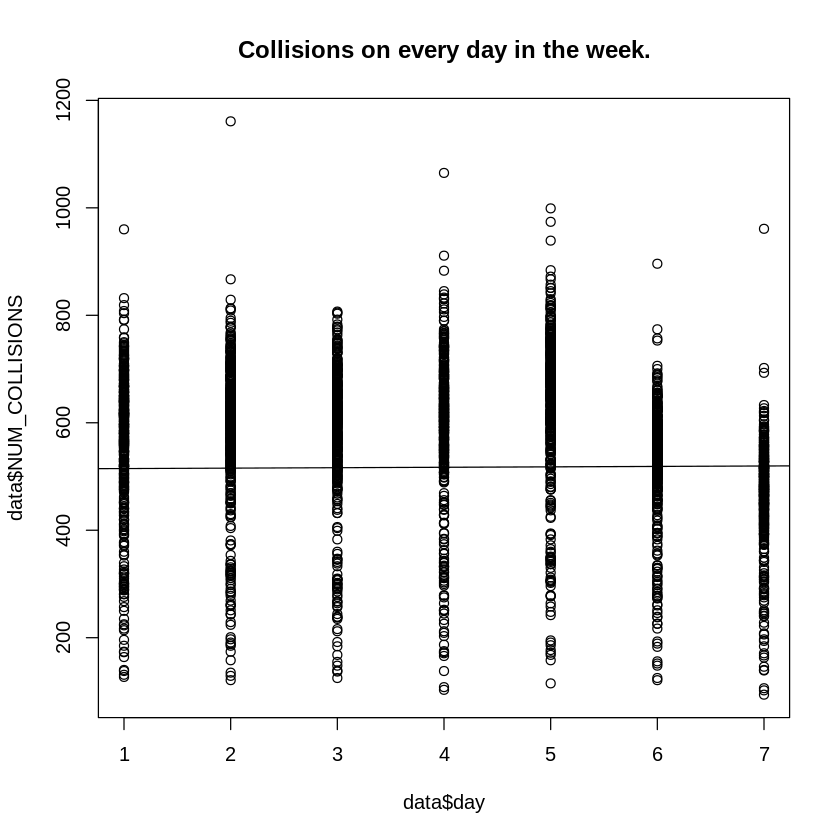

In [34]:
plot(data$day, data$NUM_COLLISIONS, main="Collisions on every day in the week.")
# Line of best fit
abline(lm(data$NUM_COLLISIONS ~ data$max))

From this, we can assess that the day of the week definitely has a very small impact on how many crashes occur. 

Next, the percipiatation of a given day will be analysed as a cause of crashing.

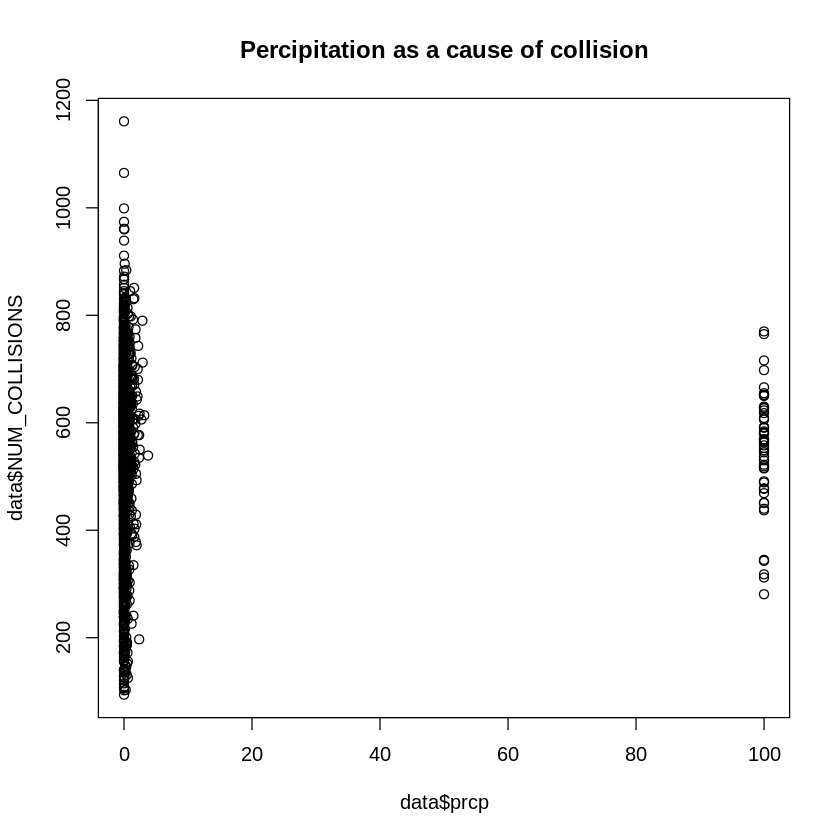

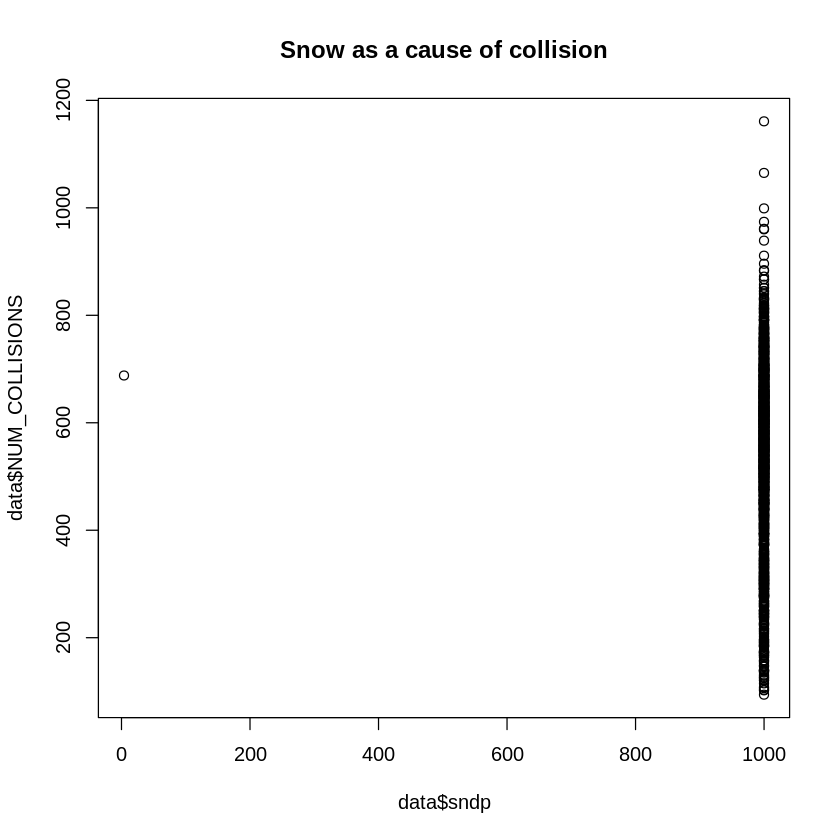

In [35]:
plot(data$prcp, data$NUM_COLLISIONS, main="Percipitation as a cause of collision")
plot(data$sndp, data$NUM_COLLISIONS, main="Snow as a cause of collision")

In [36]:
results <- lm(data$prcp ~ data$NUM_COLLISIONS)
summary(results)


Call:
lm(formula = data$prcp ~ data$NUM_COLLISIONS)

Residuals:
   Min     1Q Median     3Q    Max 
-2.201 -1.794 -1.702 -1.592 98.429 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)          2.3012028  0.9577240   2.403   0.0163 *
data$NUM_COLLISIONS -0.0009617  0.0016568  -0.580   0.5616  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.7 on 3163 degrees of freedom
Multiple R-squared:  0.0001065,	Adjusted R-squared:  -0.0002096 
F-statistic: 0.337 on 1 and 3163 DF,  p-value: 0.5616


In [37]:
results <- lm(data$sndp ~ data$NUM_COLLISIONS)
summary(results)


Call:
lm(formula = data$sndp ~ data$NUM_COLLISIONS)

Residuals:
    Min      1Q  Median      3Q     Max 
-995.42    0.18    0.35    0.50    1.60 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.001e+03  1.335e+00 749.759   <2e-16 ***
data$NUM_COLLISIONS -2.139e-03  2.309e-03  -0.926    0.354    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.7 on 3163 degrees of freedom
Multiple R-squared:  0.0002711,	Adjusted R-squared:  -4.497e-05 
F-statistic: 0.8577 on 1 and 3163 DF,  p-value: 0.3544


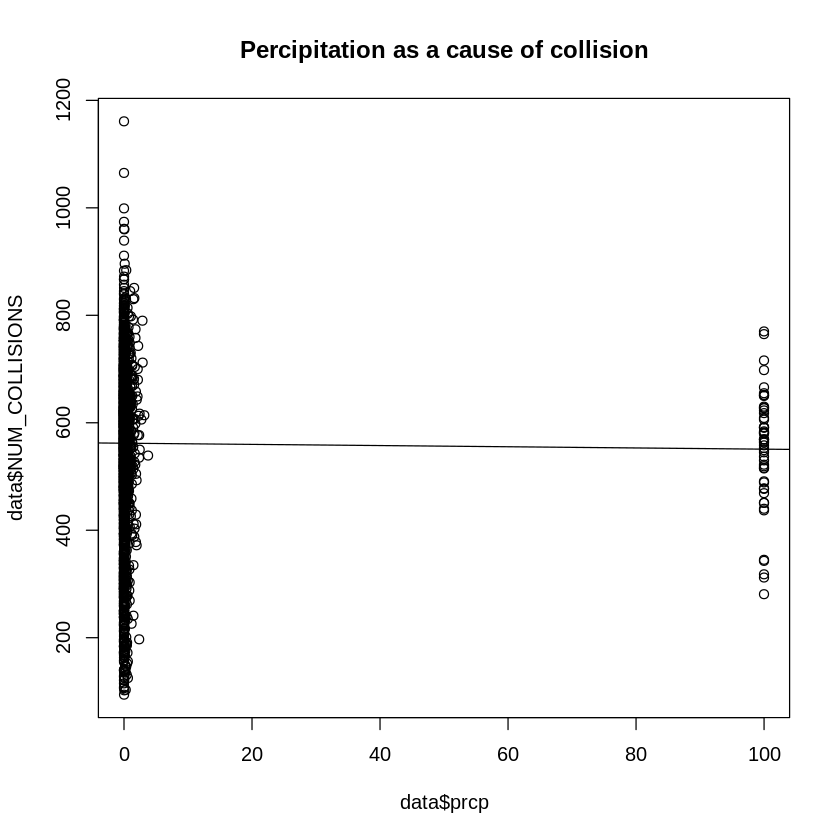

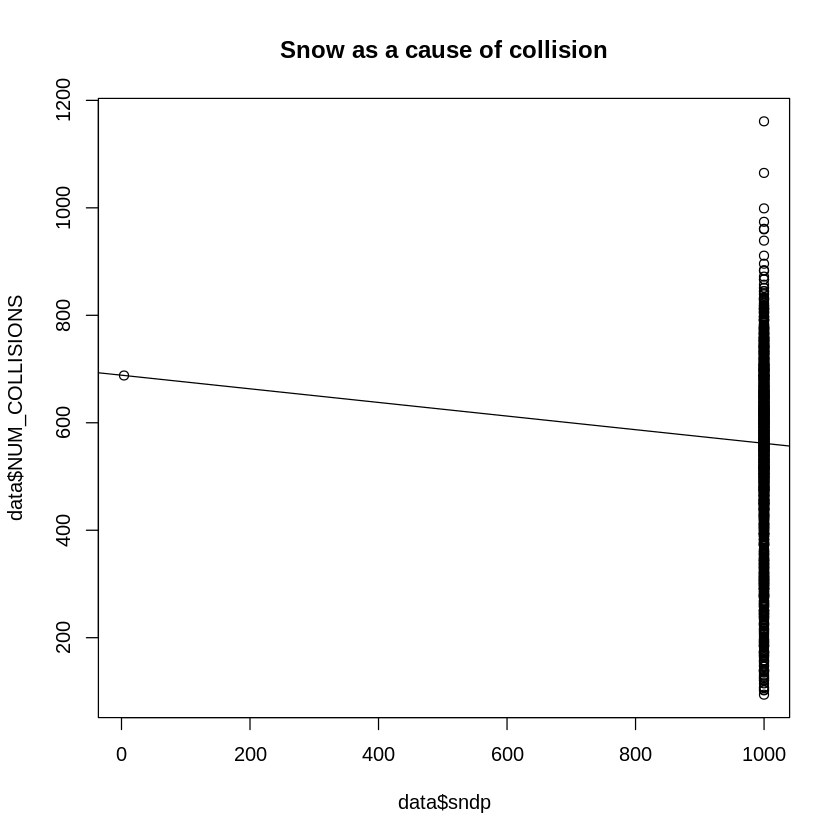

In [38]:
plot(data$prcp, data$NUM_COLLISIONS, main="Percipitation as a cause of collision")
# Line of best fit
abline(lm(data$NUM_COLLISIONS ~ data$prcp))

plot(data$sndp, data$NUM_COLLISIONS, main="Snow as a cause of collision")
# Line of best fit
abline(lm(data$NUM_COLLISIONS ~ data$sndp))

The line of best fit shows that, as a trend, the number of crashes due to snow declines throughout the year. As discussed earlier, this makes sense as snowy conditions are only present for around 1/4 of the year.

Finally, fog will be analysed.


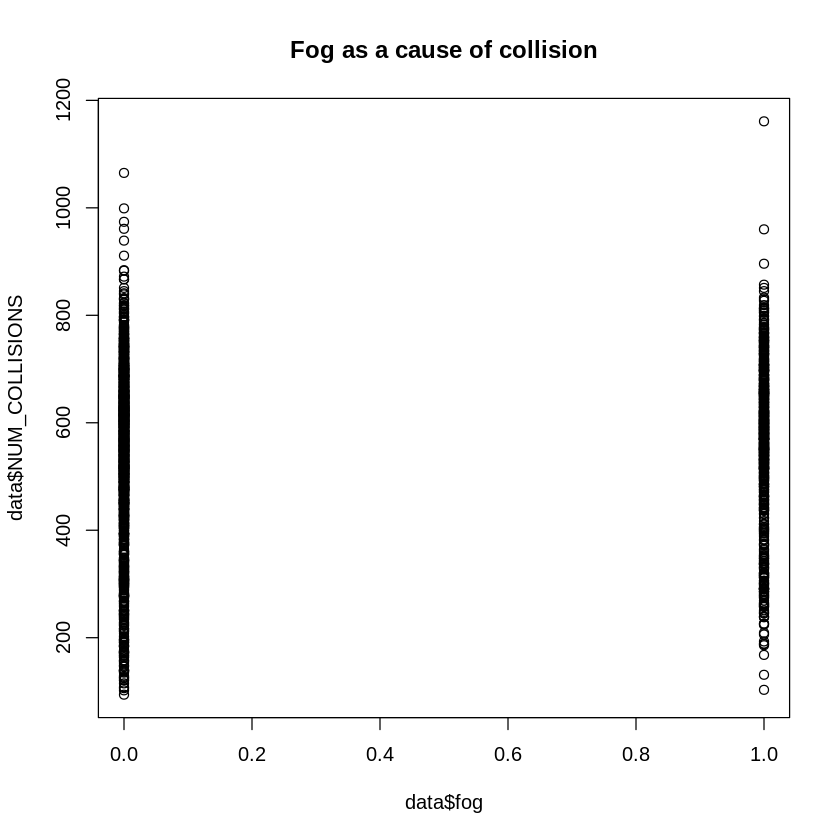

In [39]:
plot(data$fog, data$NUM_COLLISIONS, main="Fog as a cause of collision")

In [40]:
results <- lm(data$prcp ~ data$NUM_COLLISIONS)
summary(results)


Call:
lm(formula = data$prcp ~ data$NUM_COLLISIONS)

Residuals:
   Min     1Q Median     3Q    Max 
-2.201 -1.794 -1.702 -1.592 98.429 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)          2.3012028  0.9577240   2.403   0.0163 *
data$NUM_COLLISIONS -0.0009617  0.0016568  -0.580   0.5616  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.7 on 3163 degrees of freedom
Multiple R-squared:  0.0001065,	Adjusted R-squared:  -0.0002096 
F-statistic: 0.337 on 1 and 3163 DF,  p-value: 0.5616


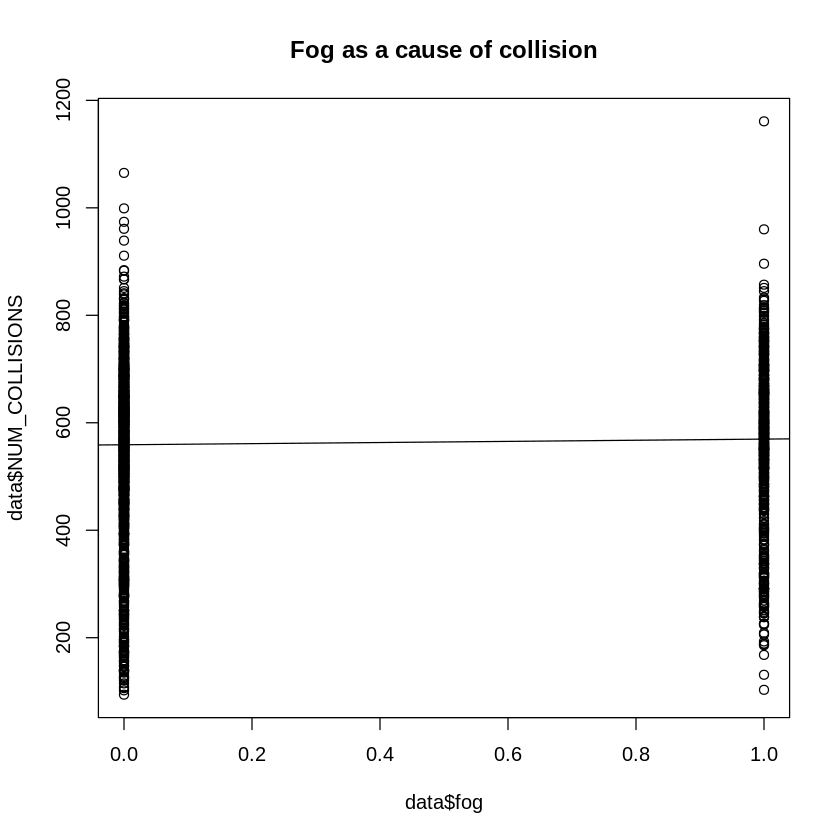

In [41]:
plot(data$fog, data$NUM_COLLISIONS, main="Fog as a cause of collision")
# Line of best fit
abline(lm(data$NUM_COLLISIONS ~ data$fog))

With an increase in the number of people driving cars between 2012 and 2020, perhaps that is also a cause of an increase number of crashes. 

# Results

# Conclusions

# References